In [ ]:
# mount drive. connecting data to jupyter notebook
from google.colab import drive # from the library called google.colab, import drive 
drive.mount('/content/gdrive/', force_remount=True) #connecting my google drive to this jupyter notebook

Mounted at /content/gdrive/


In [ ]:
from PIL import Image

In [ ]:
import numpy as np

In [ ]:
image_file ="gdrive/MyDrive/Figure Layout and Classification Independent Study/data/ScannedPages/1996ApJ___473L___5T_p2.jpeg" #string with a location of where the image lives

In [ ]:
image = Image.open(image_file)

In [ ]:
image_data = np.array(image)

In [ ]:
import matplotlib.pyplot as plt

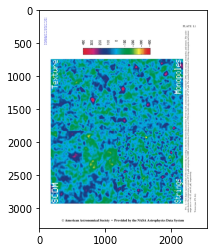

In [ ]:
plt.imshow(image_data)

In [ ]:
roi = image_data[2000:2100,300:600]

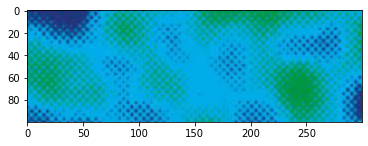

In [ ]:
plt.imshow(roi)

In [ ]:
import numpy as np
import cv2 as cv 
from matplotlib import pyplot as plt
#roi is the object or region of object we need to find
#roi = cv.imread('rose_red.png')
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
#target is the image we search in
target = image_data.copy()
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
# Find the histograms using calcHist. Can be done with np.histogram2d also
M = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
I = cv.calcHist([hsvt],[0, 1], None, [180, 256], [0, 180, 0, 256] )

In [ ]:
R = M/I
h,s,v = cv.split(hsvt)
B = R[h.ravel(),s.ravel()]
B = np.minimum(B,1)
B = B.reshape(hsvt.shape[:2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(B,-1,disc,B)
B = np.uint8(B)
cv.normalize(B,B,0,255,cv.NORM_MINMAX)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
ret,thresh = cv.threshold(B,50,255,0)

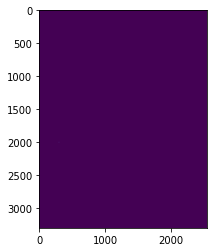

In [ ]:
plt.imshow(thresh)

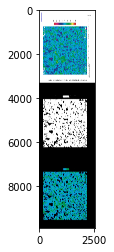

In [ ]:
#roi = cv.imread('rose_red.png')
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
target = image_data.copy()
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
# calculating object histogram
roihist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
# normalize histogram and apply backprojection
cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)
dst = cv.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
# Now convolute with circular disc
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(dst,-1,disc,dst)
# threshold and binary AND
ret,thresh = cv.threshold(dst,50,255,0)
thresh = cv.merge((thresh,thresh,thresh))
res = cv.bitwise_and(target,thresh)
res = np.vstack((target,thresh,res))
plt.imshow(res)

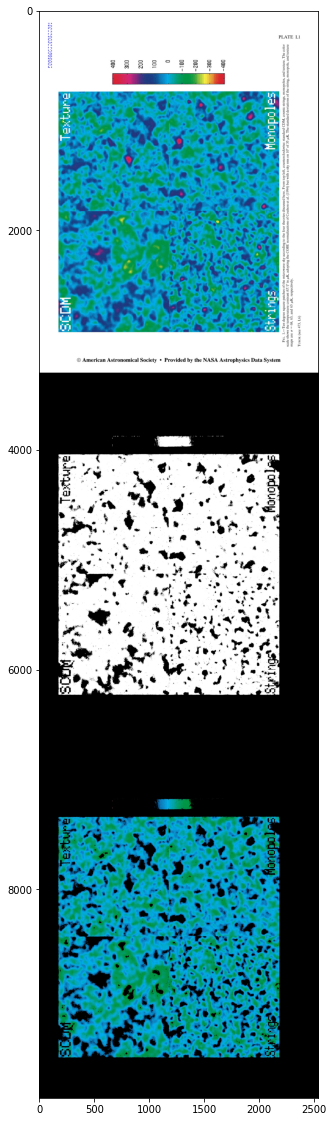

In [ ]:
fig,ax = plt.subplots(figsize = (8,20))
ax.imshow(res)